In [1]:
import pytest
pytest.importorskip('skimage')

In [2]:
from lbmpy.session import *
from lbmpy.phasefield.phasefieldstep_direct import PhaseFieldStepDirect
from lbmpy.phasefield.contact_angle_circle_fitting import liquid_lens_neumann_angles
from pystencils.fd import Diff

# Test of phase field with 4th order FD

### Free energy definition:

In [3]:
num_phases = 3
kappa = [0.01, 0.01, 0.01]
penalty_factor = 0.01
domain_size = (40, 40)

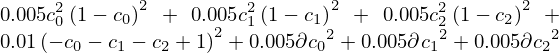

In [4]:
c = sp.symbols(f"c_:{num_phases}")

def f(c):
    return c**2 * (1 - c)**2

free_energy = sum((kappa[i] / 2) * f( c[i] ) + kappa[i]/2 * (Diff(c[i]))**2 
                  for i in range(num_phases))
free_energy += penalty_factor*(1-sum(c[i] for i in range(num_phases)))**2

free_energy

### Simulation:

In [5]:
step = PhaseFieldStepDirect(free_energy, c, domain_size)

# geometric setup
step.set_concentration(make_slice[:, :], [0, 0, 0])
step.set_single_concentration(make_slice[:, 0.5:], phase_idx=0)
step.set_single_concentration(make_slice[:, :0.5], phase_idx=1)
step.set_single_concentration(make_slice[0.25:0.75, 0.25:0.75], phase_idx=2)

step.set_pdf_fields_from_macroscopic_values()

In [6]:
for i in range(1500):
    step.time_step()

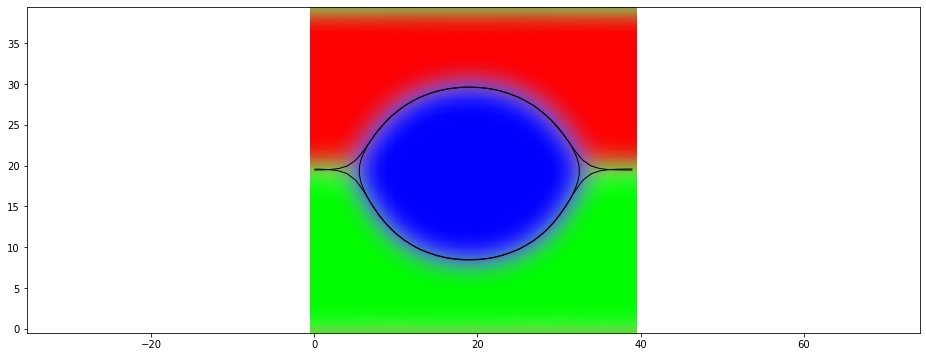

In [7]:
plt.phase_plot(step.phi[:, :])

In [8]:
angles = liquid_lens_neumann_angles(step.phi[:, :])
assert angles[0] > 107
angles

ModuleNotFoundError: No module named 'skimage'